In [1]:
import numpy as np
import prtools as pr
import matplotlib.pyplot as plt

# Ex.2.5

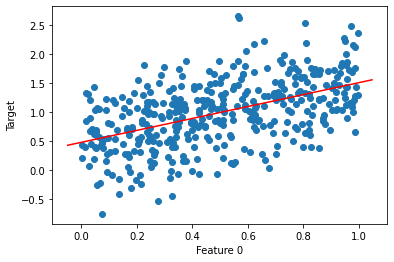

In [62]:
samples = 400
x = np.random.uniform(low=0,high=1,size=(samples,1))
e = np.random.normal(0.5, 0.5, size=(samples,1))
y = x+e
a = pr.gendatr(x,y)
w = pr.linearr(a, 1)
pr.scatterr(a)
pr.plotr(w, color='red')

# Ex.2.7

C:\Users\Anuj\Anaconda3\lib\site-packages\prtools\prtools.py:342: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  err = (labeld(x) != truelab)*1.


Error:  1.0


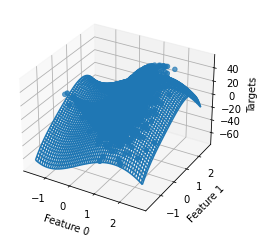

In [87]:
samples=10000
x = np.random.normal(0.5, 0.5, size=(samples,2))
y = np.array(50*np.sin(x[:,0])*np.sin(x[:,1]), ndmin=2).T
e = np.random.normal(0.5, 0.5, size=(samples,1))
y = y + e
a = pr.gendatr(x,y)
w = pr.linearr(a, 4)
pr.scatterr(a)
pr.plotr(w)
b = w.eval(a)
e = pr.testc(b)
print('Error: ', e)

Error always stays 1.0. This is because `linearr` doesn't include x1.x2 or x2.x3 etc terms. Only higher order individual terms. Whereas true y = 50sin(x1)sin(x2) + e

# Ex.2.15

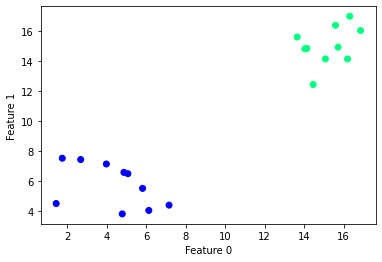

In [160]:
samples = 10
x1, y1 = np.random.multivariate_normal([5,5], [[2,0], [0,2]], samples).T
x2, y2 = np.random.multivariate_normal([15,15], [[2,0], [0,2]], samples).T
a1 = np.vstack((x1,y1)).T; a2 = np.vstack((x2,y2)).T
a = np.concatenate((a1,a2))
labels = np.concatenate((-np.ones(samples), np.ones(samples))).T
b = pr.prdataset(a, labels)
pr.scatterd(b)

In [161]:
a = np.append(np.ones([len(a),1]), a ,1)

In [162]:
w = [0,0,0]; i=0; alpha = 1; rounds=10
while i<=rounds:
    check = np.dot(w,a[i%samples])
    if(check <= 0): w = w + alpha * a[i%samples] * labels[i%samples]
    i+=1
print(w)

[-11.         -47.76898379 -64.63792886]


In [159]:
[np.dot(w,a[i]) for i in range(len(a))]

[-731.9788205969221,
 -469.6235507803474,
 -565.6562517071409,
 -493.61205106319574,
 -542.0011039684337,
 -523.5774068571885,
 -553.6833950024342,
 -463.22590749935364,
 -531.3129341634045,
 -337.5507425607325,
 -1553.6882493203773,
 -1675.2964200846377,
 -1708.607406236787,
 -1553.534224315093,
 -1820.5236110218693,
 -1607.3458371804277,
 -1491.117043333611,
 -1623.7967638966084,
 -1718.0597766444469,
 -1749.6259024427086]